Initial DataFrame:
                        _id        Date EmployeeID          CheckInTime  \
0  67493d807d9dc21b1eb5bf92  2020-04-24      E0084  1900-01-01 09:23:00   
1  67493d807d9dc21b1eb5bf93  2020-05-09      E0025  1900-01-01 08:40:00   
2  67493d807d9dc21b1eb5bf94  2020-04-18      E0017  1900-01-01 08:01:00   
3  67493d807d9dc21b1eb5bf95  2020-04-12      E0004  1900-01-01 08:42:00   
4  67493d807d9dc21b1eb5bf96  2020-01-22      E0085  1900-01-01 08:00:00   

          CheckOutTime  WorkHours  
0  1900-01-01 16:03:00   6.666667  
1  1900-01-01 16:00:00   7.333333  
2  1900-01-01 16:21:00   8.333333  
3  1900-01-01 16:10:00   7.466667  
4  1900-01-01 16:10:00   8.166667  

Processed DataFrame:
                        _id       Date EmployeeID         CheckInTime  \
0  67493d807d9dc21b1eb5bf92 2020-04-24      E0084 1900-01-01 09:23:00   
1  67493d807d9dc21b1eb5bf93 2020-05-09      E0025 1900-01-01 08:40:00   
2  67493d807d9dc21b1eb5bf94 2020-04-18      E0017 1900-01-01 08:01:00   


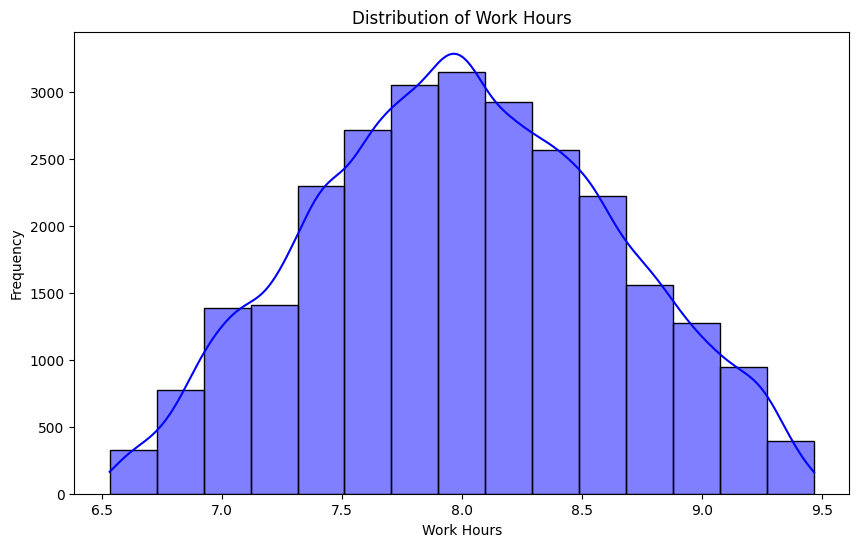

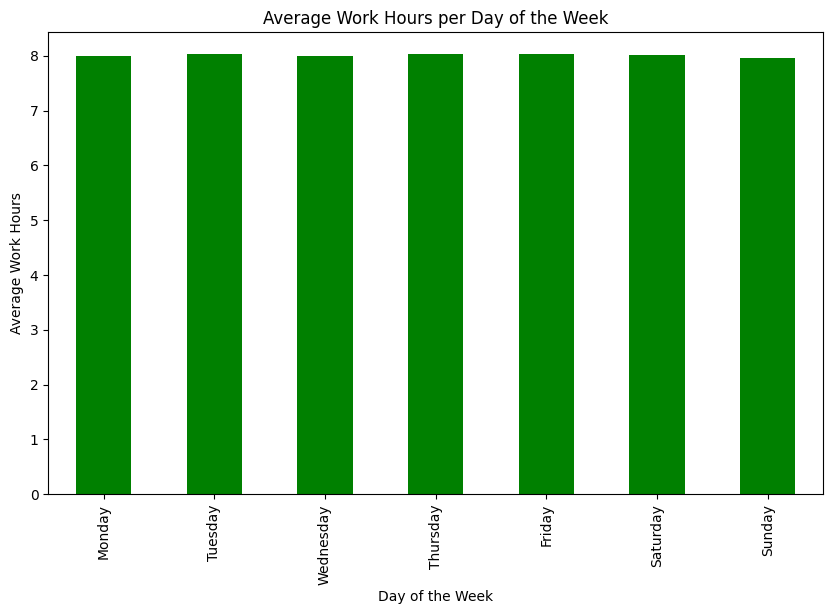

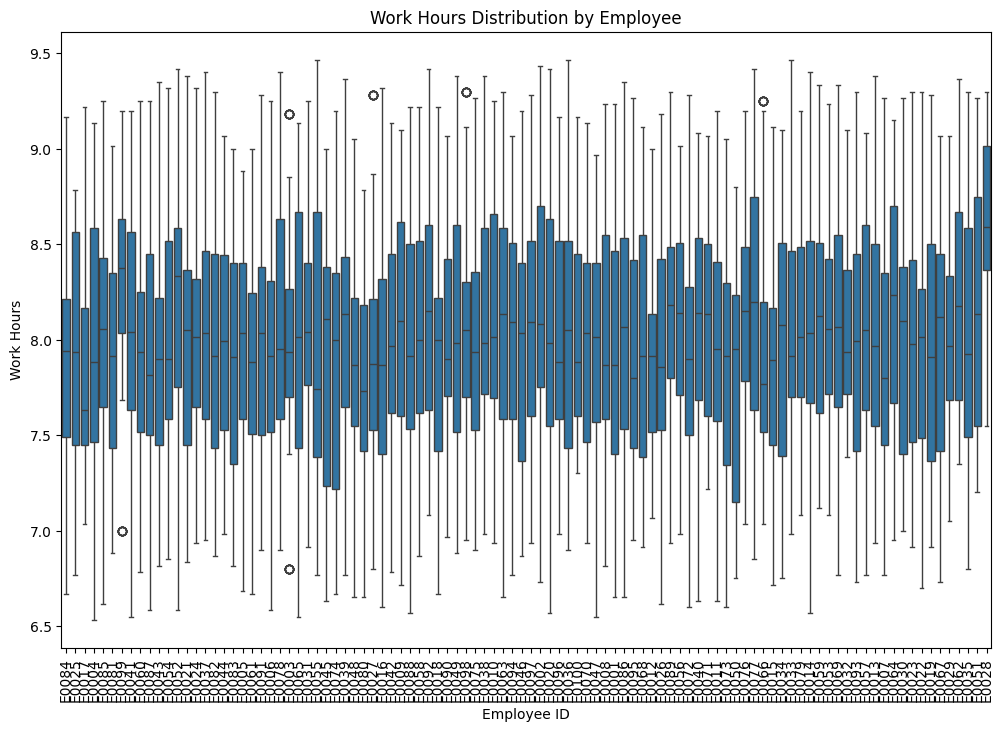

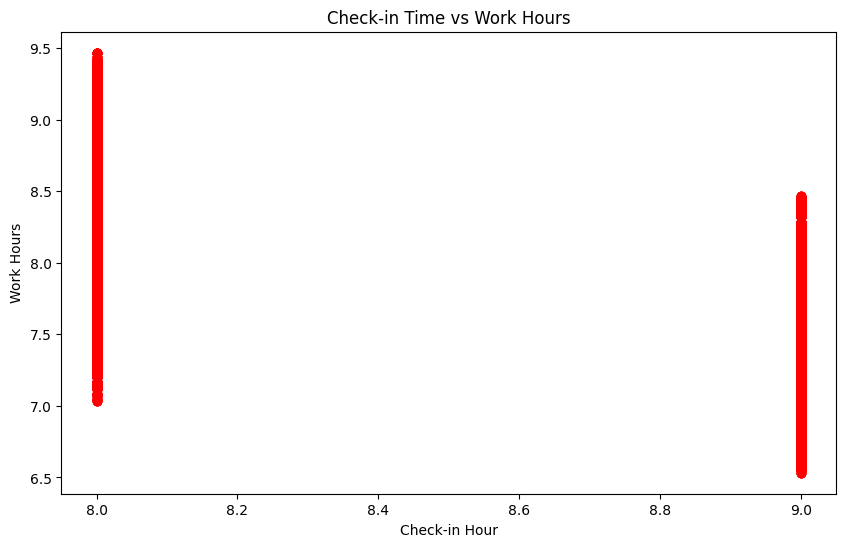

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data into a pandas DataFrame
data_file = 'Processed_Attendance.csv'  # Update with your file path
df = pd.read_csv(data_file)

# Display the first few rows of the dataset
print("Initial DataFrame:")
print(df.head())

# Convert necessary columns to appropriate data types
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['CheckInTime'] = pd.to_datetime(df['CheckInTime'], format='%Y-%m-%d %H:%M:%S')
df['CheckOutTime'] = pd.to_datetime(df['CheckOutTime'], format='%Y-%m-%d %H:%M:%S')

# Add additional useful columns
df['DayOfWeek'] = df['Date'].dt.day_name()

# Display updated DataFrame
print("\nProcessed DataFrame:")
print(df.head())

# Visualization: Distribution of Work Hours
plt.figure(figsize=(10, 6))
sns.histplot(df['WorkHours'], kde=True, bins=15, color='blue')
plt.title('Distribution of Work Hours')
plt.xlabel('Work Hours')
plt.ylabel('Frequency')
plt.show()

# Visualization: Average Work Hours per Day of the Week
plt.figure(figsize=(10, 6))
avg_hours = df.groupby('DayOfWeek')['WorkHours'].mean()
avg_hours = avg_hours.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]  # Ordering days
avg_hours.plot(kind='bar', color='green')
plt.title('Average Work Hours per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Work Hours')
plt.show()

# Visualization: Employee-wise Work Hours
plt.figure(figsize=(12, 8))
sns.boxplot(x='EmployeeID', y='WorkHours', data=df)
plt.title('Work Hours Distribution by Employee')
plt.xlabel('Employee ID')
plt.ylabel('Work Hours')
plt.xticks(rotation=90)
plt.show()

# Scatter Plot: CheckInTime vs WorkHours
plt.figure(figsize=(10, 6))
plt.scatter(df['CheckInTime'].dt.hour, df['WorkHours'], alpha=0.6, c='red')
plt.title('Check-in Time vs Work Hours')
plt.xlabel('Check-in Hour')
plt.ylabel('Work Hours')
plt.show()


